In [10]:
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns 
from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

# Downloading necessary datasets from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hasancanbiyik/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [11]:
df_train = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_train.csv', encoding= 'unicode_escape')
df_test = pd.read_csv('/Users/hasancanbiyik/sentiment_analysis_turkish/turkish_sentiment_test.csv', encoding= 'unicode_escape')

In [12]:
def pre_processing(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub("[^abcçdefgğhıijklmnoöprsştuüvyz]", " ", text)
    words = nltk.word_tokenize(text)  # Tokenize
    words = [word for word in words if word not in stopwords.words("turkish")]
    lemma = nltk.WordNetLemmatizer()
    return " ".join([lemma.lemmatize(word) for word in words])  # Lemmatize

In [13]:
df_train["clean_text"] = df_train["comment"].apply(pre_processing)
df_test["clean_text"] = df_test["comment"].apply(pre_processing)

In [14]:
# Setup for model training
X_train = df_train["clean_text"]
X_test = df_test["clean_text"]
y_train = df_train["Label"]
y_test = df_test["Label"]

# Model training
svm_model = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC())
])
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

SVM Test Accuracy : 0.897
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1333
           1       0.91      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666



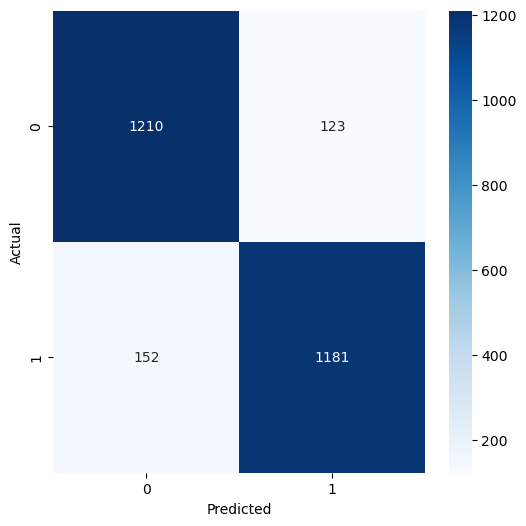

In [15]:
# Output results
print('SVM Test Accuracy : %.3f' % svm_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_svm))

# Function to plot confusion matrix
def plot_confusion_matrix(Y_test, Y_preds):
    conf_mat = confusion_matrix(Y_test, Y_preds)
    plt.figure(figsize=(6,6))
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred_svm)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Predictions and evaluation using svm_model
y_pred = svm_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print('Train Accuracy : %.3f' % svm_model.score(X_train, y_train))
print('Test Accuracy : %.3f' % svm_model.score(X_test, y_test))
print("Precision Score: %.3f" % precision_score(y_test, y_pred, average='macro'))
print("Recall Score: %.3f" % recall_score(y_test, y_pred, average='macro'))
print("F1 Score: %.3f" % f1_score(y_test, y_pred, average='macro'))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      1333
           1       0.91      0.89      0.90      1333

    accuracy                           0.90      2666
   macro avg       0.90      0.90      0.90      2666
weighted avg       0.90      0.90      0.90      2666

Train Accuracy : 0.995
Test Accuracy : 0.897
Precision Score: 0.897
Recall Score: 0.897
F1 Score: 0.897
